In [2]:
import numpy as np
import pickle
import cv2
from tqdm import tqdm_notebook
import os
import json
import math
import h5py


from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
%matplotlib inline

C:\Progra_Files\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
img_width = img_height = 256
num_channels = 3
root_path = "../Data/Buildings/"
mode = 'train'

In [9]:
def crop_and_save():
    """
    Imports images and crops to multiple sub images of a definite size inorder to preserve the resolution of the images and maximise the number of images that are available.
    """
    
    files = next(os.walk(root_path + mode + '/sat/'))[2]
    print('Total number of files =',len(files))
    
    for image_file in tqdm_notebook(files, total = len(files)):
       
   
        image_path = root_path+mode+'/sat/'+image_file
        image = cv2.imread(image_path)
        
        mask_path = root_path+mode+'/map/'+image_file[:-1]
        mask = cv2.imread(mask_path, 0)
        
        num_splits = math.floor((image.shape[0]*image.shape[1])/(img_width*img_height))
        counter = 0
        
        
        
        for r in range(0, image.shape[0], img_height):
            for c in range(0, image.shape[1], img_width):
                counter += 1
                blank_image = np.zeros((img_height ,img_width, 3), dtype = int)
                blank_mask = np.zeros((img_height ,img_width), dtype = int)
                
                new_image_path = root_path+mode+'/sat2/' + str(counter) + '_' + image_file
                new_mask_path = root_path+mode+'/map2/' + str(counter) + '_' + image_file
                
                new_image = np.array(image[r:r+img_height, c:c+img_width,:])
                new_mask = np.array(mask[r:r+img_height, c:c+img_width])
            
                
                blank_image[:new_image.shape[0], :new_image.shape[1], :] += new_image
                blank_mask[:new_image.shape[0], :new_image.shape[1]] += new_mask

                
                cv2.imwrite(new_image_path, blank_image)
                cv2.imwrite(new_mask_path, blank_mask)
        
crop_and_save()

Total number of files = 124


Total number of files = 1366



0 images were rejected.
Shape of Train Images = (1366, 256, 256, 3)
Memory size of Image array =  268566528
Data has been successfully exported.


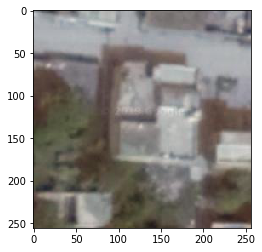

In [9]:
all_masks = []
all_images = []
def compress_images():
    """
    Imports images and respective masks and exports all of them into a h5py file.
    """
    
    global all_images, all_masks
    rej_count = 0
    counter = 0
    
    files = next(os.walk(root_path + mode + '/misc/'))[2]
    print('Total number of files =',len(files))
 

    for image_file in tqdm_notebook(files, total = len(files)):
        
        counter += 1
           
        
        image_path = root_path+mode+'/misc/'+image_file
        if not os.path.exists(image_path): continue    
        image = cv2.imread(image_path)
        imshow(image)
        
    
    
        #mask_path = root_path+mode+'/map2/'+image_file
        #mask = cv2.imread(mask_path, 0)
                  
        
        #if (len(np.unique(mask)) == 1):
         #   rej_count += 1
          #  continue
        
        
        all_images.append(image)
        #all_masks.append(mask)   
        
    
    all_images = np.asarray(all_images)
    #all_masks = np.asarray(all_masks)
    
    
    
    print('{} images were rejected.'.format(rej_count))
    print("Shape of Train Images =", all_images.shape)
    #print("Shape of Train Labels =", all_masks.shape)
    print("Memory size of Image array = ", all_images.nbytes)
    
    with h5py.File('../Data/Buildings/Compressed_Images/misc_'+mode+'_images.h5py', 'w') as hf:
        hf.create_dataset("all_images",  data=all_images)
    
    #with h5py.File('../Data/Buildings/Compressed_Images/new_'+mode+'_masks.h5py', 'w') as hf:
        #hf.create_dataset("all_masks",  data=all_masks)
    
    print("Data has been successfully exported.")
    
compress_images()

In [11]:
print("Shape of Train Images =", all_images.shape)
print("Shape of Train Labels =", all_masks.shape)

Shape of Train Images = (3979, 256, 256, 3)
Shape of Train Labels = (3979,)
